# NNIA Assignment 2

**DEADLINE: 24. 11. 2021 08:00 CET**  
Submission more than 10 minutes past the deadline will **not** be graded!

- Trevor Atkins & ID 1 (Teams username: trat00001@uni-saarland.de) 
- Tsimafei Prakapenka & tspr00001 (Teams username e.g. tspr00001@uni-saarland.de):
- Hours of work per person: Tsimafei ~3.5h Trevor ~2.75h

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required. 
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>.

# Regressions and Model Evaluation

The objectives of the exercises in this assignment are:

*   to develop an intuitive understanding of a regression model's trainable parameters
*   to have a better understanding of PCA in practice 
*   to familiarize ourselves with how to fit various regression models
*   to learn about various evaluation metrics and their characteristics

Before going ahead with the exercises, recall the following information about Simple and Multiple Linear Regressions from the lecture slides.


*   A *Simple Linear Regression* model predicts a quantitative response $y$ given a single predictor variable $x$ using the best fitting line $y \approx mx + b$ for the observed data.

*   In *Multiple Linear Regression*, the model predicts a quantitative response $y$ given multiple predictor variables by fitting a model $y \approx w_{0} +w_{1}x_{1} + w_{2}x_{2} +... + w_{n}x_{n}$ to the observed data.

*   An ideal model minizes the average squared distance between estimated response of the *i*−th sample $\hat{y}^{train}$ and actual response $y^{train}$ of the *i*−th
sample:


$$MSE_{train} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_{i}^{train} - y_{i}^{train})^{2} $$

*   To minimize $MSE_{train}$, we can set the gradient w.r.t. $w$ to $0$, solving for the weights or parameters $w$:

$$w = (X_{train}^{T}X_{train})^{-1}X_{train}^{T}y_{train}$$

We will be working with the same [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) that you have worked with before in the previous assignment in all the exercises in this assignment unless otherwise indicated.

## 1 Efficient Linear Regression (3.5 points)

Recall that there are 8 features that influence the housing prices in California according to this dataset. 

Although we want to consider as many predictive features as we can in our model, doing so may not necessarily be practical or desirable. Let's consider an assumption that Linear Regression is an algorithm that takes one extra hour to compute for every input feature (it does not but some models may work like this). Therefore, for the sake of efficiency, we want to limit the number of features in the dataset to 3.

## 1.1 Dimensions $8 \rightarrow 3$ (2 points)

To reduce the 8 features to 3, we need to find out which features we should keep and which ones we can ignore. Implement the following two methods to find out:

1. Try all subsets of size 3 of all the features and report which subset results in a Linear Regression model with the lowest MSE. (1 points)
2. Perform PCA to 3 dimensions (components) and fit a Linear Regression using these 3 features. Report the 3 features selected by PCA and the MSE. (0.5 points)
3. Compare the approaches and name one advantage of each over the other method. Comment on any insight you gain about the relationship between housing prices and the selected features in the dataset. (0.5 points)

### 1.1.1 <font color="green">Solution</font>

Try all subsets of size 3 of all the features and report which subset results in a Linear Regression model with the lowest MSE

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import itertools
import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from typing import Tuple, List

import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


There are several insights about the selected dataset from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices):
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [ ]:
housing = fetch_california_housing(as_frame=True)
df_house = housing.frame

scaled_df = pd.DataFrame(StandardScaler().fit_transform(df_house), columns=df_house.columns)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


In [ ]:
def fit_lin_reg(X: pd.DataFrame, Y: pd.Series) -> Tuple[float, List[float], float]:
    # Fit linear regression model and return MSE along with model coefficients
    model_k = linear_model.LinearRegression(fit_intercept=True)
    model_k.fit(X, Y)
    MSE = mean_squared_error(Y, model_k.predict(X))
    return MSE, model_k.coef_, model_k.intercept_


def subset_feat(subsetSize: int, X: pd.DataFrame, Y: pd.Series) -> pd.DataFrame:
    # Find MSEs for each combination of features according to desired subset size
    df_rows = []
    df_columns = ['MSE', 'Features', 'Slope', 'Intercept']

    for selected_features in itertools.combinations(X.columns, subsetSize):
        mse_on_selected_features, slope, intercept = fit_lin_reg(X[list(selected_features)], Y)
        df_rows.append((mse_on_selected_features, selected_features, slope, intercept))
    df = pd.DataFrame(df_rows, columns=df_columns)
    
    return df.sort_values(by=['MSE'], ignore_index=True)

In [ ]:
Y = scaled_df.MedHouseVal
X = scaled_df.drop(columns='MedHouseVal', axis=1)

# outputs should be MSEs and feature names
MSEs = subset_feat(3, X, Y)
display(MSEs.head(10))

,MSE,Features,Slope,Intercept
0,0.415741,"(MedInc, Latitude, Longitude)","[0.6033513631605236, -0.896884948022407, -0.86...",-8.189394e-15
1,0.482807,"(MedInc, HouseAge, Latitude)","[0.7035425715540965, 0.19037597618604674, -0.0...",5.893667e-17
2,0.487898,"(MedInc, HouseAge, AveRooms)","[0.7289458221445272, 0.18346906801302976, -0.0...",1.584555e-16
3,0.489313,"(MedInc, HouseAge, AveOccup)","[0.7115352734833827, 0.1908427748411942, -0.03...",1.558539e-16
4,0.490004,"(MedInc, HouseAge, Population)","[0.7116756287621621, 0.19952598242365974, 0.03...",1.560022e-16
5,0.490665,"(MedInc, HouseAge, Longitude)","[0.7102974834847212, 0.18857335263711403, -0.0...",2.975420e-17
6,0.490730,"(MedInc, HouseAge, AveBedrms)","[0.7116091796080253, 0.19128692763919078, 0.01...",1.570165e-16
7,0.491288,"(MedInc, AveRooms, AveBedrms)","[0.8810725840820782, -0.5072795736330723, 0.43...",2.255278e-16
8,0.514275,"(MedInc, AveRooms, Latitude)","[0.7044566344819665, -0.06976940374167151, -0....",7.492487e-17
9,0.517097,"(MedInc, Population, Latitude)","[0.6807591511849855, -0.03816442395198552, -0....",5.692190e-17


### 1.1.2 <font color="green">Solution</font>

Perform PCA to 3 dimensions (components) and fit a Linear Regression using these 3 features. 

In [ ]:
# outputs should be MSE and feature names
def reconstruct_with_PCA(standartized_data: pd.DataFrame, number_of_components: int) -> pd.DataFrame:
    """Reconstruct data using PCA and returns new data and the value of reconstruction error."""
    pca = PCA(n_components=number_of_components)
    pca.fit(standartized_data.values)

    print('Explained variance ratio:', pca.explained_variance_ratio_)

    data_from_pca = pca.transform(standartized_data.values)

    data_from_pca_df = pd.DataFrame(
        data_from_pca, 
        columns=[f'PC-{i+1}' for i in range(number_of_components)],
    )

    return data_from_pca_df

In [ ]:
pca_X = reconstruct_with_PCA(X, 3)

display(pca_X.head())
pca_mse, _, _ = fit_lin_reg(pca_X, Y)
print('PCA MSE:', pca_mse)

Explained variance ratio: [0.25336868 0.23516245 0.15888635]


,PC-1,PC-2,PC-3
0,1.882704,-0.503362,-0.314134
1,1.371120,-0.121406,1.905258
2,2.086868,-0.501136,-0.937245
3,1.575801,-1.239495,-1.025957
4,1.591206,-1.345264,-1.249171


PCA MSE: 0.9710305607951087


### 1.1.3 <font color="green">Solution</font>


One advantage of raw feature selection: the result is easily interpretable. <br>

We see that top-10 feature subsets contain MedInc (median income for households within a block of houses measured in tens of thousands of US Dollars). This observation means that this particular feature has the biggest impact on house value. This could be explained, since people with higher income are tending to buy more expensive houses.<br>

One advantage of PCA: we have no need to try all subsets of features, which can be very hard computationally.<br>

## 1.2 Dimensions $8 \rightarrow 1$ (1.5 points)

Having to visualize the data across multiple dimensions can be cumbersome. Let's perform the same task as in 1.1 but this time consider only one feature (both a subset of the 8 features and PCA with 1 component). This way it will be easier to visualize the relationship of your predictive and target variables. Of course, you still want to select the feature that will result in the best performing model.

Your output should include:

1.   The respective MSEs (only the lowest MSE for the subset is fine.)
2.   Plot a graph of the data with prices on the $y$ axis and the single feature/principal component on the $x$ axis. In the plot, also include a line as defined by the Linear Regression. (Make sure you don't forget to set the correct slope and y-intercept (constant)).

In [ ]:
one_feature_MSEs = subset_feat(1, X, Y)
display(one_feature_MSEs.head(10))

,MSE,Features,Slope,Intercept
0,0.526553,"(MedInc,)",[0.6880752079585479],1.583194e-16
1,0.976912,"(AveRooms,)",[0.15194828974145774],1.937558e-16
2,0.979218,"(Latitude,)",[-0.1441602768746593],4.816591e-17
3,0.988844,"(HouseAge,)",[0.10562341249320996],2.032173e-16
4,0.997819,"(AveBedrms,)",[-0.04670051296948688],1.988474e-16
5,0.997887,"(Longitude,)",[-0.045966615117978525],-1.881359e-16
6,0.999392,"(Population,)",[-0.024649678888894872],2.035275e-16
7,0.999437,"(AveOccup,)",[-0.023737412956134338],2.038808e-16


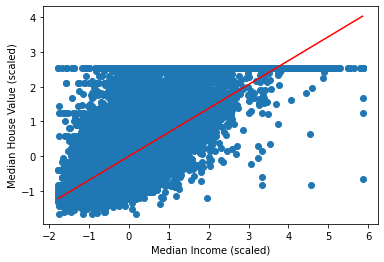

In [ ]:
x = np.linspace(min(scaled_df.MedInc), max(scaled_df.MedInc), 100)
y = x*one_feature_MSEs.loc[0].Slope[0]+one_feature_MSEs.loc[0].Intercept

plt.xlabel('Median Income (scaled)')
plt.ylabel('Median House Value (scaled)')
plt.scatter(scaled_df.MedInc, Y)
plt.plot(x, y, 'red')

In [ ]:
pca_X_one_feature = reconstruct_with_PCA(X, 1)
display(pca_X_one_feature.head())
pca_one_feature_mse, pca_one_feature_slope, pca_one_feature_intercept  = fit_lin_reg(pca_X_one_feature, Y)
print('One-feature PCA MSE, slope and intercept:', pca_one_feature_mse, pca_one_feature_slope, pca_one_feature_intercept)

Explained variance ratio: [0.25336868]


,PC-1
0,1.882704
1,1.371120
2,2.086868
3,1.575801
4,1.591206


One-feature PCA MSE, slope and intercept: 0.998793645774826 [0.02439585] 2.0272408423686205e-16


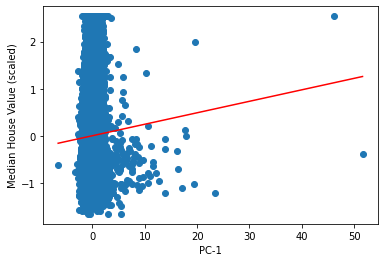

In [ ]:
x = np.linspace(min(pca_X_one_feature.values), max(pca_X_one_feature.values), 100)
y = x*pca_one_feature_slope[0]+pca_one_feature_intercept

plt.xlabel('PC-1')
plt.ylabel('Median House Value (scaled)')
plt.scatter(pca_X_one_feature.values, Y)
plt.plot(x, y, 'red')

In [ ]:
# from solution import ....

# import your function from your .py file here and run this cell when you're done!
# outputs should be the MSEs, feauture names, and plots (make sure to label your plots!)

## 2 Manual Regression (4 points)

Now that you are a bit more familiar with the data and the features. This exercise aims to develop some intuition behind regressions by manually adjusting the parameters (coefficients and intercept) in the model. The functions below all perform regression (predicting a real value) but they are far from perfect. Your goal is to improve the four functions from the initial ones in the `code cells` as follows:

1. `hand_base` should serve as a baseline. The constraint is that it should only return a *single (constant) number* for all values. In other words, this is a model with no adjustable parameters. However, for the dataset there exists a unique value that minimizes the Mean Squared Error (MSE). Which one is it? (0.5 points) 
2. `hand_linear` should be a reasonable *linear* function that utilizes the input feature(s). Note that it should be strictly linear, that is in the form $\sum \lambda_i x_i+\lambda_{const}$ where $\lambda_k$ and $\lambda_{const}$ are the coefficients and intercept that you can estimate from the given data by *trial and error*. Your estimates should be reasonable, i.e. definitely better than `hand_base`. Do this exercise before proceeding to the next function where you will obtain the coefficients and intercepts from fitting a Linear Regression model using *sklearn*. We will award full points based on any justified solution that's better than `hand_base`. Make sure that you read what the features mean and argue why you chose the specific formula. (1 point) (Note: we are *not* asking you to compute the coefficients and intercept, but rather play around with adjusting the coefficients and intercept manually to arrive at your best estimate.)
3. `auto_linear`, obtain the coefficients and intercept from fitting a Linear Regression model using `sklearn`.
<!-- Note how the coeficients here should be similar to the coefficients you came up with in your `hand_linear` regression model. -->
(Consult [sklearn Linear Regression Documention](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on how to obtain the model's coefficients and intercept.) (1 point)
4. `hand_complex` does not have any restriction on the content of the function. It can contain polynomial relationships (e.g. `x[0]*x[0]`), `if-else` statements, etc.) Now that you have both your hand crafted model and the one from `sklearn`, improve upon either of the models (or you can start with the parameters in the `auto_linear` model) so that the performance of the `hand_complex` is better than `auto_linear`.
What are the disadvantages of this more complex approach apart from the difficulty of creating it? (Hint: think about unseen data.)

Always comment on what led you to select the specific values.

## 2 <font color="green">Solution</font>

Modify the functions in the `code cell` below.


In [ ]:
%load_ext autoreload
%autoreload 2

print("Features", housing.feature_names)

def hand_base(_x):
  # We choose 0, since Y data is standartized. 
  # So, mean(Y) ~ 0, and it the best approximation.
  return 0

def hand_linear(x: pd.Series):
  coefs = [0] * len(x)
  # First coefficient is for Median Income which is proven to be the best single variable for the regression.
  # So, We make all coefficients zero except MedInc.
  coefs[0] = 1

  # -0.1 is quite a random thing, no real logic under it
  return np.dot(coefs, x)-0.1

# TODO:
# 1. Fit LinearRegression
# 2. Report training MSE
# 3. Examine the coefficients and intercept and use them for the `auto_linear` function
# <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>

mse, slope, intercept = fit_lin_reg(X, Y)
print('Training MSE: ', mse)

def auto_linear(x):
  # DONE: use coefficients from your linear regression
  return np.dot(x, slope)+intercept

def hand_complex(x):
  # We have discovered that original y values never exceed 2.6, whereas the appoximation produced by regression sometimes does.
  # Hence, cutting appoximation outliers with constant 2.6 should produce better MSE.
  # please look at cells above for details
  return min(2.6, auto_linear(x))

hand_base_y = list(map(hand_base, X.values))
hand_linear_y = list(map(hand_linear, X.values))
auto_linear_y = list(map(auto_linear, X.values))
hand_complex_y = list(map(hand_complex, X.values))

print(f"MSE Hand-Base: {mean_squared_error(Y, hand_base_y):.5f}")
print(f"MSE Hand-Linear: {mean_squared_error(Y, hand_linear_y):.5f}")
print(f"MSE Auto-LR: {mean_squared_error(Y, auto_linear_y):.5f}")
print(f"MSE Hand-Complex: {mean_squared_error(Y, hand_complex_y):.5f}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Features ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Training MSE:  0.3937673148001949
MSE Hand-Base: 1.00000
MSE Hand-Linear: 0.63385
MSE Auto-LR: 0.39377
MSE Hand-Complex: 0.38230


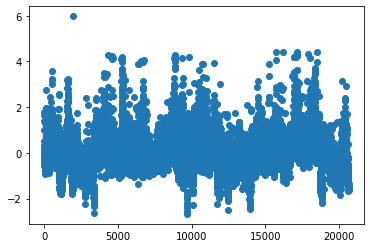

In [ ]:
x = np.linspace(0, len(auto_linear_y), len(auto_linear_y))
plt.scatter(x, auto_linear_y)

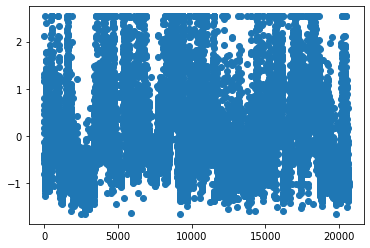

In [ ]:
plt.scatter(x, Y)

In [ ]:
print(max(Y))
print(max(auto_linear_y))

2.540410937738136
5.98106326537652


In [ ]:
print(len([i for i, num in enumerate(Y) if num > 2.6]))
print(len([i for i, num in enumerate(auto_linear_y) if num > 2.6]))

0
174


Conclusion: we see that the hand-crafted non-linear approach based on automatic linear regression gives the lowest MSE. However, it looks like overfitting, since the constant value (2.6) was selected based exclusively on training data. Actual test data can have different values with other hidden max_value constants.

## 3 Evaluation Metrics (2.5 points)

To appropriately a assess model's performance, we need to know what metrics to use based on your application(s). 

## 3.1 Confusion Matrix (0.5 points)


1. What is a confusion matrix? Give an example of one for a 2-class classification problem in your response. (0.5 points)

## 3.2 Accuracy, Precision, Recall, F-1, and MCC (2 points)

Watch [this video about evaluation metrics](https://youtu.be/wpQiEHYkBys). Discuss the differences between Accuracy, Precision, Recall, F1, MCC (Mathews Correlation Coeffcient):

1. How are they calculated? (0.5 points)
2. In which case can a model get the perfect score? (0.5 points)
3. Give examples of situations when you would prefer one over the others. (0.5 points)
4. Chooses one metric. In which case can a model get a very high score even though we would judge its performance to be bad? I.e. how can the model cheat the metric? (0.5 points)









## 3 <font color="green">Solution</font>

### 3.1
A confusion matrix provides a summary for the types of errors that a classifier has against test data. A two-dimensional matrix with one dimension as the true class of a object and another with the class assigned by the classifier. 
An example with a 2-class classification problem is one with predicting coronavirus:


 _ | Assigned Positive (Infected) |Assigned Negative (Normal)
-------------------|------------------|------------------
Actual Positive (Infected)  | 110 | 30
Actual Negative  (Normal)     | 10 | 50

---

### 3.2
Discuss the differences between Accuracy, Precision, Recall, F1, MCC (Mathews Correlation Coeffcient):

How are they calculated? (0.5 points)<br>

Accuracy is calculated by 
$$\frac{\text{Number of correct predictions (True Positives + True Negatives)}}{\text{Total number of predictions}}$$<br>
Precision is calculated by 
$$\frac{\text{True Positive}}{\text{True Positive + False Positive}}$$<br>
Recall is calculated by $$\frac{\text{True Positive}}{\text{True Positive + False Negative}}$$<br>
F1 is calculated by $$\frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}}$$<br>
Matthews Correlation Coefficient (MCC)  is calculated by $$\frac{\text{TP} \cdot \text{TN} + \text{FP} \cdot \text{FN}}{\sqrt{\text{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}}$$

In which case can a model get the perfect score? 

A model can get the perfect score for accuracy if all the predicted or assigned classes match with all the true class values out of the total number of predications. For precision and recall, the perfect score aligns with the null hypothesis, where a given value or element is relevant to the class. So a perfect precision score indicates every classification was relevant (but not whether all of the relevant elements were identified) and a perfect recall score indicates all relevant elements were found (but not whether all of the irrelevant elements were found).

Give examples of situations when you would prefer one over the others. 

In spam detection, precision may be preferred over the others because it is important for there to be less mail to be marked as spam when it is not.

In medical situations, recall may be preferred over the others because it is important for reduce the number of patients to be sent home when actually infected. 

Chooses one metric. In which case can a model get a very high score even though we would judge its performance to be bad? I.e. how can the model cheat the metric?

A model can get a very high training accuracy score even though its performance would be bad because it could be "cheating" the metric by overfitting with the data. Also, with recall the model can "cheat" the metric by assigning every element as the "positive" class.

# Bonus. Polynomial Regression and Overfitting (1 point):

Find out how incorporating more features affects our model on the [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

1. Transform the feature space using polynomial features: <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html> (hint: make use of the Pipeline class) and run a regression model on top of it. Use degrees 1, 2, 3 and 4. 

2. Plot a graph with polynomial degree on the x-axis and training MSE on the y axis. What is an essential caveat to expanding the original feature space like this? (Hint: Think of unseen data again.)

## Bonus: <font color="red">To Do</font>


In [ ]:
%load_ext autoreload
%autoreload 2
  
# from solution import ....
# import your function from your .py file here and run this cell when you're done!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
